In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataframe=pd.read_csv("Training Data 2017 2018.csv")

In [3]:
dataframe=dataframe.drop("Unnamed: 0",axis=1)

In [4]:
print(dataframe['text'][1])

white house correspondents dinner dead know total disaster embarrassment great country stands fake news alive well beautifully represented saturday night


In [5]:
from sklearn.utils import shuffle
dataframe_s = shuffle(dataframe)

In [6]:
train=dataframe_s.iloc[:2401,:]
test=dataframe_s.iloc[2402:2835,:]

In [7]:
train=train.dropna()
train=train.drop(columns=['Date'])
train['label']=train['label']+2
test=test.dropna()
test['label']=test['label']+2

from keras.utils.np_utils import to_categorical
y_train=to_categorical(train['label'])
num_class=y_train.shape[1]
print("num_class=",y_train.shape)

In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)

C:\Users\qinke\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
tokenizer.fit_on_texts(train['text'])

In [10]:
x_train=tokenizer.texts_to_matrix(train['text'])
x_test=tokenizer.texts_to_matrix(test['text'])

In [11]:
x_train=x_train.reshape(x_train.shape[0],5000,1)
x_train.shape

(2379, 5000, 1)

In [12]:
x_test=x_test.reshape(x_test.shape[0],5000,1)
x_test.shape

(423, 5000, 1)

In [13]:
print(x_train.shape)

(2379, 5000, 1)


In [14]:
x_train,x_val,y_train,y_val=train_test_split(x_train,train['label'],test_size=0.10,random_state=42)

In [15]:
print(x_train.shape)

(2141, 5000, 1)


x_train,x_val,y_train,y_val=train_test_split(x_train,train['label'],test_size=0.10,random_state=42)

In [16]:
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization,Convolution2D, MaxPooling2D
from keras.layers import Dense , Dropout, Lambda, Flatten
from keras import Sequential

In [17]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(250,input_shape=(5000, 1),activation='relu'))
#here the standardize is the function we define upwords
model.add(Dense(50,activation='relu'))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
#only with softmax, it is a linear model

In [18]:
from keras.optimizers import SGD 
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [19]:
history = model.fit(x_train, # Features
                      y_train, # Target
                      epochs=20, # Number of epochs
                      verbose=1, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(x_val, y_val)) # Data for evaluation

Train on 2141 samples, validate on 238 samples
Epoch 1/20
2141/2141 [==============================] - 49s 23ms/step - loss: 1.5385 - acc: 0.3400 - val_loss: 1.4872 - val_acc: 0.3361
Epoch 2/20
2141/2141 [==============================] - 48s 22ms/step - loss: 1.4885 - acc: 0.3685 - val_loss: 1.4837 - val_acc: 0.3361
Epoch 3/20
2141/2141 [==============================] - 48s 23ms/step - loss: 1.4870 - acc: 0.3685 - val_loss: 1.4864 - val_acc: 0.3361
Epoch 4/20
2141/2141 [==============================] - 45s 21ms/step - loss: 1.4806 - acc: 0.3685 - val_loss: 1.4738 - val_acc: 0.3361
Epoch 5/20
2141/2141 [==============================] - 46s 21ms/step - loss: 1.4752 - acc: 0.3685 - val_loss: 1.4884 - val_acc: 0.3361
Epoch 6/20
2141/2141 [==============================] - 46s 21ms/step - loss: 1.4720 - acc: 0.3685 - val_loss: 1.4744 - val_acc: 0.3361
Epoch 7/20
2141/2141 [==============================] - 46s 22ms/step - loss: 1.4575 - acc: 0.3713 - val_loss: 1.4831 - val_acc: 0.3361
E

In [20]:
import matplotlib.pyplot as plt

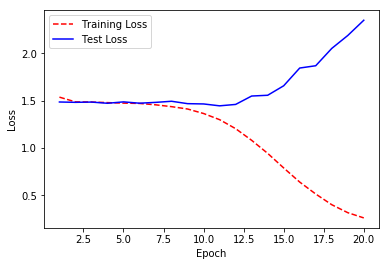

In [21]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

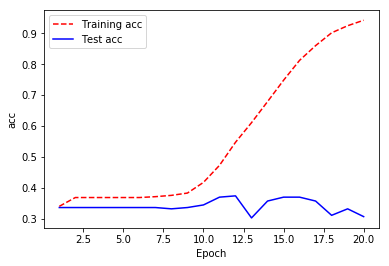

In [22]:
# Get training and test loss histories
training_loss = history.history['acc']
test_loss = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training acc', 'Test acc'])
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show();

In [23]:
predict_table = pd.DataFrame( columns=['text','label'],index=['1'])

In [24]:
predict_table['text'][0]="white house correspondents dinner"
print(predict_table)


                                text label
1  white house correspondents dinner   NaN


In [25]:
today=tokenizer.texts_to_matrix(predict_table['text'])
print(today.shape)
today=today.reshape(today.shape[0],5000,1)

(1, 5000)


In [26]:
X=model.predict(today)
print(model.predict(today))

[[0.01502048 0.37826887 0.01557266 0.48560733 0.10553068]]


In [27]:
predict_table['label'][0]=np.argmax(X,axis=1)
print(predict_table)

                                text label
1  white house correspondents dinner   [3]


In [28]:
x=model.predict(x_test)

In [29]:
from pandas.core.frame import DataFrame

In [30]:
X=DataFrame(x)

In [31]:
print(X)

            0         1         2         3         4
0    0.005273  0.001463  0.157726  0.001451  0.834087
1    0.028376  0.103930  0.004226  0.861659  0.001809
2    0.001480  0.005031  0.069863  0.919740  0.003886
3    0.086097  0.308586  0.043086  0.476517  0.085714
4    0.036590  0.202017  0.021138  0.734477  0.005778
5    0.108515  0.126814  0.000035  0.756839  0.007797
6    0.005638  0.759156  0.014951  0.009376  0.210878
7    0.079374  0.516461  0.024135  0.260186  0.119844
8    0.382708  0.367416  0.039191  0.016428  0.194256
9    0.735781  0.104368  0.002343  0.058334  0.099174
10   0.030670  0.157696  0.002061  0.012230  0.797343
11   0.060938  0.375588  0.168748  0.368215  0.026511
12   0.345487  0.384770  0.002020  0.083573  0.184151
13   0.004261  0.925771  0.002473  0.024647  0.042848
14   0.036271  0.153884  0.001803  0.802226  0.005816
15   0.000076  0.007310  0.209546  0.058216  0.724851
16   0.006533  0.024318  0.530719  0.370345  0.068084
17   0.028179  0.672159  0.0

In [32]:
X['max_value']=X.max(axis=1)
X['max_index']=np.argmax(x,axis=1)

In [33]:
predict_test_y=np.array(X['max_index'])
test_y=np.array(test['label'])

In [34]:
sum(predict_test_y==test_y)

138

In [35]:
X['predict']=predict_test_y
X['acc']=test['label']+2

In [36]:
y=DataFrame(columns=['predict','acc'])

In [37]:
y['predict']=X['predict']
y['acc']=test['label']+2

In [38]:
final_table = pd.DataFrame({'text':test['text'],'actual':test['label']+2,'predicted':predict_test_y})

In [39]:
print(final_table)

                                                   text  actual  predicted
256   daca abandoned democrats unfair would tied des...       6          4
124   big questions comey badly reviewed book answer...       2          3
428   strongly pushing comprehensive background chec...       2          3
1366                                               join       3          3
2269  today welcomed victory christian center school...       3          3
1757  failing made every wrong prediction including ...       5          3
184   despite aluminum tariffs aluminum prices peopl...       6          1
2061                                 make america great       2          1
2707               congratulations new attorney general       3          0
528   disgraceful person illegally country killed li...       5          0
880   lawsuit leadership consumer financial protecti...       3          4
195   briefed shooting youtube hq san bruno californ...       2          1
780   reason originally e

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [11 26  4 20  9  0  0]
 [12 60  7 55 17  0  0]
 [ 4 11  4  5  2  0  0]
 [15 40  2 50 20  0  0]
 [ 4 20  3  9 13  0  0]]
[[0.16 0.37 0.06 0.29 0.13]
 [0.08 0.4  0.05 0.36 0.11]
 [0.15 0.42 0.15 0.19 0.08]
 [0.12 0.31 0.02 0.39 0.16]
 [0.08 0.41 0.06 0.18 0.27]]


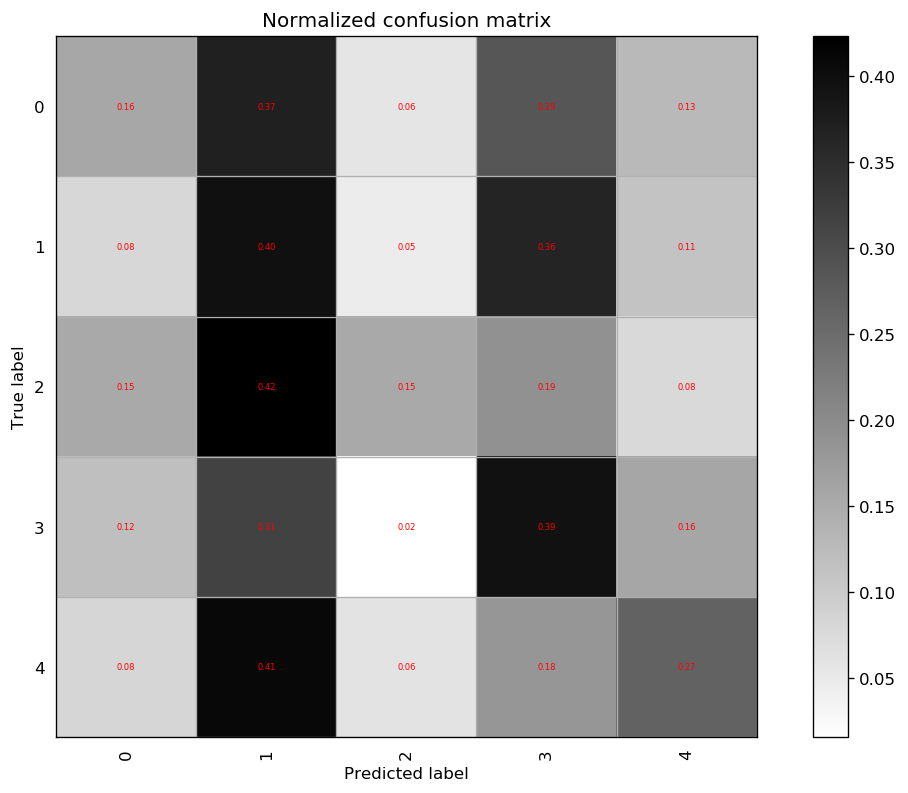

In [93]:
# -*-coding:utf-8-*-
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#labels表示你不同类别的代号，比如这里的demo中有13个类别
labels = ['0', '1', '2', '3', '4']

#y_true代表真实的label值 y_pred代表预测得到的lavel值
y_true = test['label']+2
y_pred = predict_test_y

tick_marks = np.array(range(len(labels))) + 0.5


def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm= confusion_matrix(y_true, y_pred)
print(cm)
cm=np.delete(cm,0,axis=0)
cm=np.delete(cm,0,axis=0)
cm=np.delete(cm,5,axis=1)
cm=np.delete(cm,5,axis=1)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print (cm_normalized)
plt.figure(figsize=(12, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.01:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=5, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
# show confusion matrix
plt.show()

history = model.fit(x_train, # Features
                      train['label'], # Target
                      epochs=20, # Number of epochs
                      verbose=1, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

model=Sequential()
model.add(Dense(50,input_shape=(5000, 1)))
#here the standardize is the function we define upwords
model.add(Dense(50,activation='relu'))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
#only with softmax, it is a linear model

!pip install pydot

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128 
nb_classes = 5
nb_epoch = 20

history = LossHistory()
model.fit(X_train, Y_train,
            batch_size=batch_size, nb_epoch=nb_epoch,
            verbose=1, 
            validation_data=(X_test, Y_test),
            callbacks=[history])

history.loss_plot('epoch')